# 붓꽃(iris)분류기 만들기

- Iris 데이터셋은 3종류의 붓꽃(Setosa, Versicolour, Virginica)을 4가지 특성(꽃받침 길이와 너비, 꽃잎 길이와 너비)을 사용하여 분류하는 문제입니다.

- ` 4가지 특성(feature)들을 이용`하여 붓꽃 품종을 분류해봅니다.모델 구축부터 훈련 및 평가까지 진행하여 `분류 정확도를 93% 이상`으로 만듭니다.

```
실습목표
1. 데이터셋을 불러와서 모델에 입력가능하도록 변경합니다.
2. 의사결정 트리 모델을 불러와서 학습시킵니다.
3. 모델을 학습시키고 평가합니다.

```



```
실습단계
1. 라이브러리 임포트
2. 데이터셋 로드 및 전처리
3. 모델 로드
4. 모델 학습
5. 모델 평가 및 예측
6. 결과 시각화

```


### 1.라이브러리 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

### 2.데이터셋 로드 및 전처리

iris data는 사이킷런에 이미 준비되어 있는 데이터이며, 꽃의 정보를 저장하고 있는 data와 해당 꽃의 품종을 저장하는 target으로 이루어져 있습니다.


---


data는 다음과 같은 `4가지의 feature`로 이루어져 있으며, (150, 4) shape을 가진 numpy array입니다.

- sepal length(꽃받침 길이)
- sepal width (꽃받침 넓이)
- petal length (꽃잎 길이)
- petal width (꽃잎 넓이)

target은 다음과 같은 `세 종류`의 붓꽃 품종이 저장되어 있으며, (150, ) shape을 가진 numpy array입니다.

- setosa
- versicolor
- virginica

---
아이리스(Iris) 데이터셋을 로드하여, 특성(feature) 데이터를 X에, 타겟(target) 데이터를 y에 저장합니다.

In [ ]:
# Iris 데이터셋 로드
iris = _____
# iris = load_iris()
X,y = iris.data , iris.target

데이터를 정규화하기 위해 StandardScaler를 사용하여 특성 데이터의 스케일을 조정하고, <br> 훈련(train) 데이터와 검증(test) 데이터를 80:20의 비율로 분리합니다.

In [ ]:
# 데이터 정규화
scaler = ___
# scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
___, ___, ___, ___ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 3.모델 로드

In [ ]:
# 로지스틱 회귀 모델 로드
model = _____()
# model = DecisionTreeClassifier(max_depth=3, random_state=42)

### 4.모델 학습

In [ ]:
# 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 5.모델 평가 및 예측

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



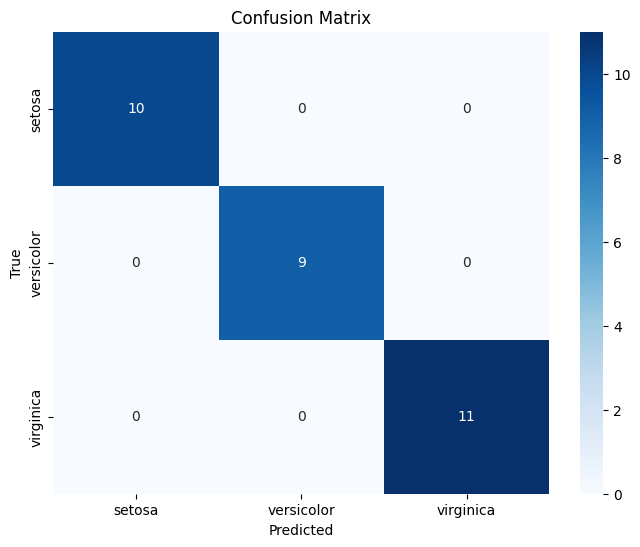

In [ ]:
# 테스트 세트를 사용하여 예측 수행
y_pred = model._______(X_test)
# y_pred = model.predict(X_test)

# 모델 평가
accuracy = ________(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
conf_matrix = ______________(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns._____(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
# sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 6.결과 시각화

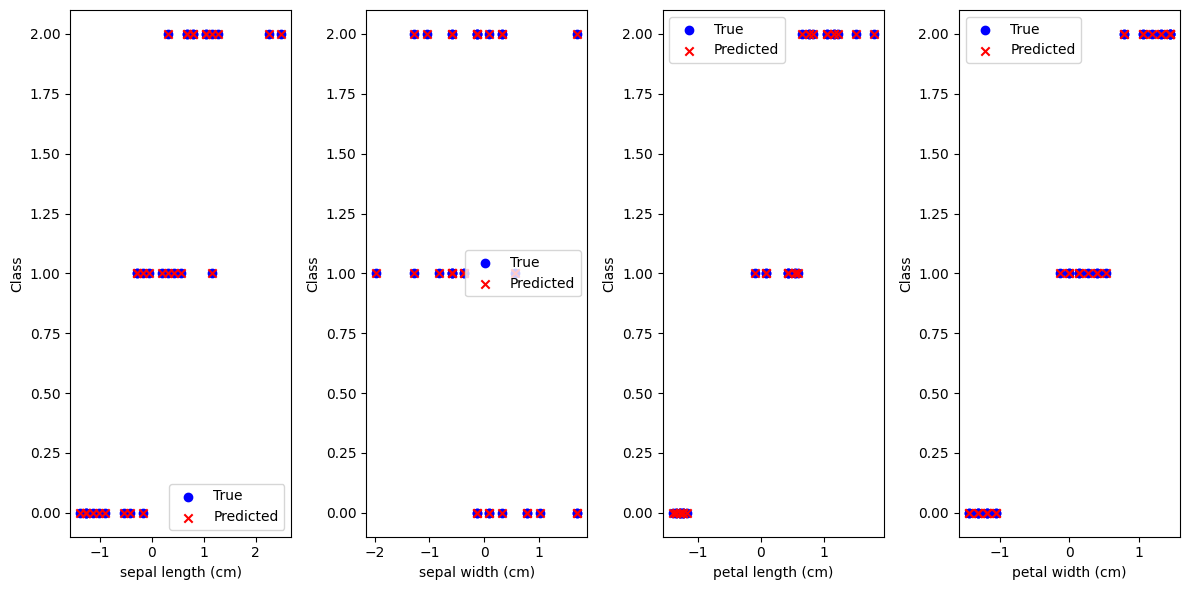

In [ ]:
# 몇 가지 예측 결과 시각화
def plot_iris_predictions(X, y_true, y_pred, features):
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i+1)
        plt.scatter(X[:, i], y_true, color='blue', marker='o', label='True')
        plt.scatter(X[:, i], y_pred, color='red', marker='x', label='Predicted')
        plt.xlabel(feature)
        plt.ylabel('Class')
        plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# 테스트 세트의 예측 결과 시각화
features = iris.feature_names
plot_iris_predictions(X_test, y_test, y_pred, features)

## (선택) 부스팅계열 모델로 붓꽃분류하기

1. 데이터셋 불러오기
2. 모델 불러오기
3. 모델 학습하기
4. 모델 추론/평가하기

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###1.데이터셋 불러오기

In [ ]:
# 아이리스 데이터셋을 불러옵니다.
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.모델 불러오기

- XGBoost 모델이란? : <br>
eXtreme Gradient Boosting 모델로, 다양한 머신러닝 문제에서 인기가 있는 앙상블 모델
- XGBoost 가 궁금하다면? : https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
# XGBoost 분류기를 생성합니다.
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss'
    )

### 3.모델 학습하기

- sklearn 내부 모듈을 사용하므로, fit 메서드 사용가능

In [ ]:
# 모델을 훈련 데이터에 적합시킵니다.
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### 4.모델 평가/추론하기

In [ ]:
# 테스트 데이터에 대해 예측을 수행합니다.
predictions = model.predict(X_test)

In [ ]:
# 모델의 정확도를 평가합니다.
accuracy = accuracy_score(y_test, predictions)
print(f"정확도: {accuracy * 100:.2f}%")

정확도: 100.00%


In [ ]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])